# DUN 9 czerwca 2016

### Typy katastrof

* Katastrofa sinej dali (blue sky catastrophe). *Mieliśmy coś, np. cykl graniczny, który nam znika (ucieka do nieskończonośc).

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def test_trajectories(derivative, max_start, N, alpha, *params, new_plot = True):
    t = np.linspace(0, 20, 2000)
    if new_plot:
        plt.figure(figsize=(10,10))
    for i in range(N):
        r0 = max_start*2*(np.random.random(2)-0.5)
        r = odeint(derivative, r0, t, args = params)
        x, v = r.T
        fmt = "k-"
        plt.plot(x, v, fmt, alpha = alpha)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("v")
    if new_plot:
        plt.show()

def vanderpol(r, t,k, mu, b, C):
    x, y = r
    return np.array([k*y + mu*x*(b-y**2), -x + C])

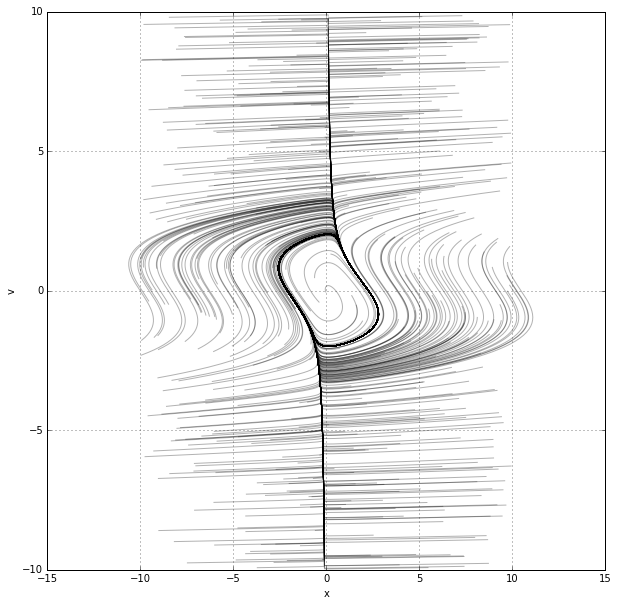

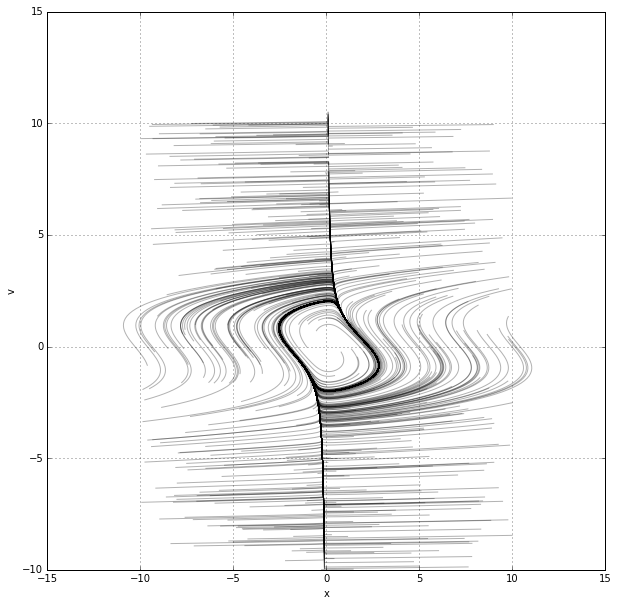

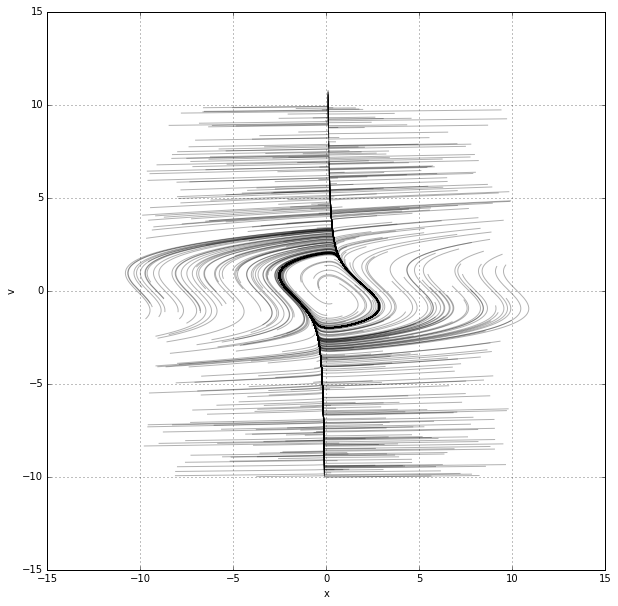

In [18]:
params = k, mu, b = 1, 1, 1
for c in [.10, .12, .14]:
    test_trajectories(vanderpol, 10, 500, 0.3, *params, c)

Zderzenie siodła z cyklem granicznym na rozmaitości.

### Histereza

*Bistabilność* - dla jednego zakresu parametrów kontrolnych występuje wiele rozwiązań

Obszar niestabilny między stabilnymi w przestrzeni fazowej: często oznacza to bifurkację siodło-węzeł

Przeskok na stabilne trajektorie z zanikających stabilnych

> Rozmaitości (wokół punktów stałych) nadają smaczek tej całej zabawie

# Bifurkacje atraktorów chaotycznych

Stan chaotyczny: dopełnienie zbioru wszystkich niestabilnych orbity (w sytuacji gdy nie ma żadnej stabilnej)

Czyli cała przestrzeń poza niestabilnymi rozmaitościami

Przypomnienie: 3 drogi do chaosu:
1. Podwajanie okresu
2. Intermitencja
3. Ruelle, Takens, Newhouse


Trzech wspaniałych, `Grebogin, Ott, Yorke` wymyślili pojęcie **kryzysu atraktora chaotycznego**

Mamy basen atrakcji, w miarę zmiany parametrów $r$ się, załóżmy, zmniejsza.
W środku mogą być siodła hiperboliczne. Jak któreś trafi na granicę basenu atrakcji...

** Czas życia na atraktorze chaotycznym ** przy kryzysie: zmieniając $r$, gdy następuje hetero\homokliniczny kryzys, mona oszacować że rozkład prawdopodobieństwa czasu życia $$P(t) \sim \exp(-\frac{t}{<t>})$$

$$ <t> \sim (p-p_c)^{-\gamma}\text{ dla }p \geq p_c$$

gdzie $\gamma$ to wykładnik krytyczny kryzysu. Na symulacjach: doprowadziliśmy do kryzysu: ustawiliśmy parametr kontrolny niedaleko poza kryzysem. Uruchamiamy układ\obliczenia. Za każdym razem dostaniemy inny czas siedzenia na atraktorze. Jak uśrednić ten czas po różnych runach, to tak będzie wyglądał.

Mapa logistyczna z $r=4.05$ (mały czub paraboli przekroczył jedynkę). Obszar szerokości $Re (r-4)^(1/2)$, z w którym logistyczna wypada.

Kryzysy często: DDO, oscylator Duffinga...

### Intermitencja wywołana kryzysem

Wcześniej: faza laminarna i faza chaotyczna

Teraz: intermitencja chaos-chaos: fazy chaotyczne jednego rodzaju poprzetykane fazami chaotyczynmi innego rodzaju
* Zderzenie siodło\atraktor - styczność rozmaitości siodła i rozmaitości atraktora.  gwałtowne powiększenie atraktora

Kryzys wewnętrzny w logmapie (odwzorowaniu logistycznym): okno trójka, okres orbity podwaja się jak $3*2^n$, NAGLE w punkcie akumulacji obszar po którym to skacze się gwałtownie powiększa na całą linię zamiast kilku odcinków!

To jest intermitencja: atraktor jedneygo rodzaju (orbity skupione w kilku obszarach) i drugiego (orbity rozpierzchające się po całym przedziale)

### Kryzys scalenia (merge, zcalenia)

Dwa baseny atrakcji, A i B, rozłączne. W miarę zmieniania $R$ jest moment gdzie baseny atrakcji się stykają. Trochę jak z dyfuzją w dwóch naczyniach... Też obserwujemy nagły wzrost basenu atrakcji

Przykład: praca z taśmą magnetoelastyczną: bez równań ruchu, całkowicie doświadczalna praca.
* Mamy amorficzna taśmę metaliczną
    * bęben, szybko wirujący
    * nad nim tygiel z podgrzanym materiałem
    * możnaby zostawić żeby wystygł, wtedy mono\polikryształ
    * zamiast tego wylewamy z tygla na węgiel
    * jak metal zastyga to traci przyczepność
    * chłodzenie rzędu $10^5-10^6 K/s$
* tutaj z ferromagnetycznego materiału
* wsadzamy go między dwie cewki Helmholtza, które dają jednorodne pole magnetyczne
* taśma jest magnetostrykcyjna (podobnie jak piezoelektryk tylko odwrotnie)
* mmoduł Younga zależy od pola, więc sobie ustawiamy punkt pracy odpowiednio (w liniowej części) i śmigamy
* malutki atraktor w Takensie; zwiększając pole dostajemy dużo większy atraktor


# Synchronizacja (Pikovsky, Rosenblum)

Lorentz: dwa oscylatory, zamiast x2 wstawiamy x1 (koniecznie zakodzić!)

In [26]:
### Lorentz, R < 1
from mpl_toolkits.mplot3d import Axes3D

def test_trajectories_3d_substsynchro(derivative, max_start, N, alpha, *params):
    t = np.linspace(0, 20, 2000)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(211, projection='3d')
    ax2 = fig.add_subplot(212)
    for i in range(N):
        r0 = max_start*2*(np.random.random(5)-0.5)
        r = odeint(derivative, r0, t, args = params)
        x, y, z, y2, z2 = r.T
        distances = np.sqrt((y-y2)**2 + (z-z2)**2)
        fmt = "-"
        ax.plot(x, y, z, "b" + fmt, alpha = alpha)
        ax.plot(x, y2, z2, "r" + fmt, alpha = alpha)
        ax2.plot(t, distances)
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax2.set_xlabel("t")
    ax2.set_ylabel("r2-r1")
    ax2.grid()

def lorenz_synchro(r, t, sigma, R, b, R2, b2):
    x, y, z, y2, z2 = r
    return np.array([sigma*(y-x), x*(R-z)-y, x*y-b*z, x*(R2-z2)-y2, x*y2-b2*z2])

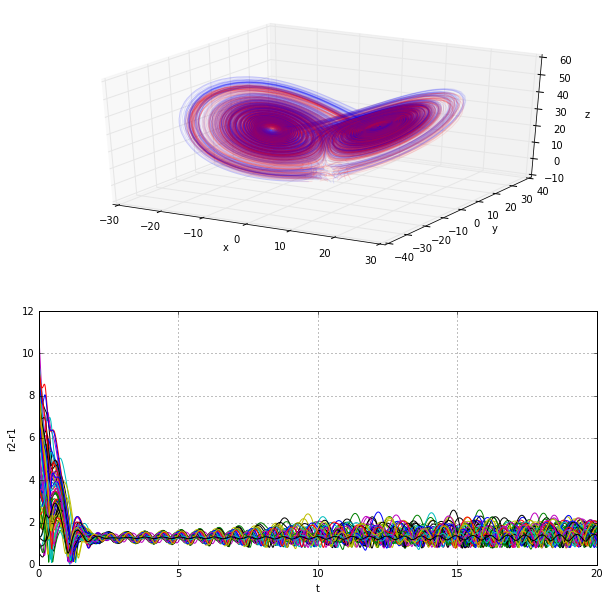

In [27]:
N = 70
test_trajectories_3d_substsynchro(lorenz_synchro, 5, N, 0.1, 10, 28, 8/3,27, 3)

Kodowanie przez przepuszczenie przez Lorenza czy Rosslera. Niestety kryptograficznie zawodzi bo synchronizacja - z tolerancją, nie trzeba się wstrzelić dokładnie w ten sam przedział parametrów, by to zbiegło!
